In [7]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [8]:
import gym
import vgdl.interfaces.gym as vdgym
import vgdl

In [9]:
vdgym.register_sample_games()

In [10]:
vdgym.list_space

<module 'vgdl.interfaces.gym.list_space' from '/home/irafm/hyner/vgdl_2_0/py-vgdl/vgdl/interfaces/gym/list_space.py'>

In [11]:
gym.envs.registry

├──CartPole: [ v0, v1 ]
├──MountainCar: [ v0 ]
├──MountainCarContinuous: [ v0 ]
├──Pendulum: [ v1 ]
├──Acrobot: [ v1 ]
├──LunarLander: [ v2 ]
├──LunarLanderContinuous: [ v2 ]
├──BipedalWalker: [ v3 ]
├──BipedalWalkerHardcore: [ v3 ]
├──CarRacing: [ v1 ]
├──Blackjack: [ v1 ]
├──FrozenLake: [ v1 ]
├──FrozenLake8x8: [ v1 ]
├──CliffWalking: [ v0 ]
├──Taxi: [ v3 ]
├──Reacher: [ v2 ]
├──Pusher: [ v2 ]
├──InvertedPendulum: [ v2 ]
├──InvertedDoublePendulum: [ v2 ]
├──HalfCheetah: [ v2, v3 ]
├──Hopper: [ v2, v3 ]
├──Swimmer: [ v2, v3 ]
├──Walker2d: [ v2, v3 ]
├──Ant: [ v2, v3 ]
├──Humanoid: [ v2, v3 ]
├──HumanoidStandup: [ v2 ]
├──vgdl_aliens: [ v0 ]
├──vgdl_aliens_objects: [ v0 ]
├──vgdl_aliens_features: [ v0 ]
├──vgdl_boulderdash: [ v0 ]
├──vgdl_boulderdash_objects: [ v0 ]
├──vgdl_boulderdash_features: [ v0 ]
├──vgdl_chase: [ v0 ]
├──vgdl_chase_objects: [ v0 ]
├──vgdl_chase_features: [ v0 ]
├──vgdl_frogs: [ v0 ]
├──vgdl_frogs_objects: [ v0 ]
├──vgdl_frogs_features: [ v0 ]
├──vgdl_missilecomma

In [12]:
game = gym.make('vgdl_sokoban-v0')
game.reset()

AttributeError: 'NoneType' object has no attribute 'get_image'

In [66]:
import networkx as nx

def get_all_distances():
    G_set = create_matrix_from_layout("/home/irafm/hyner/vgdl_2_0/py-vgdl/vgdl/layouts/*.txt")
    G_zelda = G_set.get('zelda_lvl0.txt')
    #print(G_zelda)
    return dict(nx.all_pairs_shortest_path_length(G_zelda))


In [79]:
def get_sprite_positions(data, env):
    pos_lst = []
    block_size = env.game.block_size
    for i in data:
        rect = i['state']['rect']
        pos = rect.left // block_size, rect.top // block_size
        pos_lst.append((pos[1], pos[0]))

    return pos_lst


In [85]:
def evaluate_state(env, distances_dict):
    block_size = env.game.block_size
    bad_lst = ['monsterQuick', 'monsterNormal', 'monsterSlow']
    sub_goal = 'key'
    bad_pos_lst = []
    pos = env.game.get_game_state().data['sprites'][sub_goal]
    sub_goal_pos_lst = get_sprite_positions(pos, env)
    rect = env.game.get_avatars()[0].rect
    agent_pos = rect.left // block_size, rect.top // block_size
    agent_pos = (agent_pos[1], agent_pos[0])
    for i in bad_lst:
        pos = env.game.get_game_state().data['sprites'][i]
        bad_pos_lst += get_sprite_positions(pos, env)
    sub_goal_distances = []
    for i in sub_goal_pos_lst:
        if i in distances_dict[agent_pos]:
            sub_goal_distances.append(distances_dict[agent_pos][i])
    enemy_distances = [3]
    for i in bad_pos_lst:
        if i in distances_dict[agent_pos]:
            enemy_distances.append(distances_dict[agent_pos][i])

    min_sub_goal_dist = min(sub_goal_distances)
    min_enemy_dist = min(enemy_distances)
    score = min_sub_goal_dist - min_enemy_dist


    return score, min_sub_goal_dist

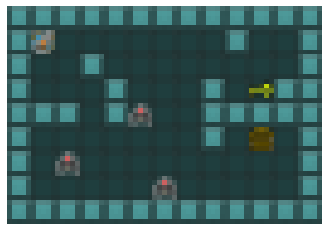

(236,)
[(1, 1) list([0.0, -1.0]) list([1.0, 0.0, 0.0, 0.0, 0.0]) list([]) (5, 4)
 list([0.0, 0.0]) list([0.0, 1.0, 0.0, 0.0, 0.0]) list([]) (2, 6)
 list([0.0, 0.0]) list([0.0, 1.0, 0.0, 0.0, 0.0]) list([]) (6, 7)
 list([0.0, 0.0]) list([0.0, 1.0, 0.0, 0.0, 0.0]) list([]) (10, 5)
 list([0.0, 0.0]) list([0.0, 0.0, 1.0, 0.0, 0.0]) list([]) (10, 3)
 list([0.0, 0.0]) list([0.0, 0.0, 0.0, 1.0, 0.0]) list([]) (0, 0)
 list([0.0, 0.0]) list([0.0, 0.0, 0.0, 0.0, 1.0]) list([]) (1, 0)
 list([0.0, 0.0]) list([0.0, 0.0, 0.0, 0.0, 1.0]) list([]) (2, 0)
 list([0.0, 0.0]) list([0.0, 0.0, 0.0, 0.0, 1.0]) list([]) (3, 0)
 list([0.0, 0.0]) list([0.0, 0.0, 0.0, 0.0, 1.0]) list([]) (4, 0)
 list([0.0, 0.0]) list([0.0, 0.0, 0.0, 0.0, 1.0]) list([]) (5, 0)
 list([0.0, 0.0]) list([0.0, 0.0, 0.0, 0.0, 1.0]) list([]) (6, 0)
 list([0.0, 0.0]) list([0.0, 0.0, 0.0, 0.0, 1.0]) list([]) (7, 0)
 list([0.0, 0.0]) list([0.0, 0.0, 0.0, 0.0, 1.0]) list([]) (8, 0)
 list([0.0, 0.0]) list([0.0, 0.0, 0.0, 0.0, 1.0]) list([]) 

KeyError: 'avatar'

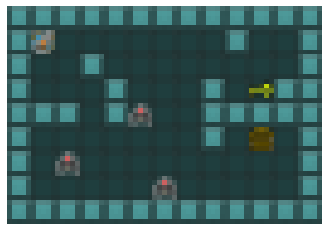

In [69]:
import gnwrapper
import gym

env = gnwrapper.Animation(gym.make('vgdl_zelda-v0', obs_type="objects"))
env.render()
obs = env.reset()

for _ in range(1000):
    next_obs, reward, done, info = env.step(env.action_space.sample())
    env.render()

    obs = next_obs
    print(obs.shape)
    print(obs)
    print(env.notable_sprites)
    print(env.game.get_game_state())
    break

    if done:
        obs = env.reset()

In [70]:
import itertools
import heapq as hq
from dataclasses import dataclass, field
from typing import Any,List,Tuple

@dataclass(order=True)
class Subgoal:
    priority: int
    previous_actions: list
    info: Any=field(compare=False)


class PriorityQueue:
    def __init__(self):
        self.elements: List[Subgoal] = []

    def empty(self) -> bool:
        return not self.elements

    def put(self, item: Subgoal):
        hq.heappush(self.elements,item)

    def get(self) -> Subgoal:
        return hq.heappop(self.elements)

    def merge(self,items: List):
        for item in items:
            hq.heappush(self.elements,item)

In [123]:
env = gym.make('vgdl_zelda-v0', obs_type="objects")
obs = env.reset()
first_state_info = env.game.get_game_state()
first_state = Subgoal(priority=0, previous_actions=[],\
                      info=first_state_info)
frontier = PriorityQueue()
frontier.put(first_state)

def visualize_actions(action_list, current_state):
    env = gnwrapper.Monitor(gym.make('vgdl_zelda-v0', obs_type="objects"))
    env.reset()
    env.game.set_game_state(current_state)
    print(current_state.keys())
    for i in action_list:
        next_obs, reward, done, info = env.step(i)
    return env
seen_states = {first_state_info}
all_distances = get_all_distances()
for i in range(1000):
    if len(frontier.elements)==0:
        #print(f"no more subgoals on {i}th iteration")
        break
    #else: print('frontier size:',len(frontier.elements))
    current = frontier.get()
    state = current.info
    env.game.set_game_state(state)
    for i, a in enumerate(env.game.get_possible_actions()):
        next_obs, reward, done, info = env.step(i)
        if done:
            env.game.set_game_state(state)
            continue
        new_state = env.game.get_game_state()
        if done or new_state in seen_states:
            env.game.set_game_state(state)
            continue
        seen_states.add(new_state)
        actions = current.previous_actions+[i]
        score, finished = evaluate_state(env, all_distances)
        print(finished)
        if finished == 0:
            print("finished")
        new_state = Subgoal(score, actions, new_state)
        frontier.put(new_state)
        env.game.set_game_state(state)

tmp_state = frontier.get()
tmp_state = frontier.get()
print(tmp_state.previous_actions)
env = visualize_actions(tmp_state.previous_actions, first_state_info)

10
10
11
10
10
10
10
11
10
10
11
10
10
10
11
10
10
10
11
10
10
10
11
10
10
10
11
10
10
10
11
10
10
10
11
10
10
10
11
10
10
11
11
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
9
9
9
10
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
8
8
8
9
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
7
8
8
8
7
7
8
7
7
8
7
7
7
8
7
7
7
8
7
7
7
8
7
7
7
8
7
7
7
8
7
7
7
8
7
7
7
8
7
7
6
7
6
7
6
7
6
8
7
7
7
8
7
7
7
8
7
7
7
8
7
7
7
8
7
7
7
8
7
7
7
8
7
7
7
8
7
7
7
8
7
7
8
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
6
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
6
6
6
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
6
6
6
7
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7


KeyError: 'avatar'

In [111]:
def visualize_actions(env,action_list, current_state):
    env = gnwrapper.Monitor(gym.make('vgdl_zelda-v0', obs_type="objects"))
    env.reset()
    env.game.set_game_state(current_state)

    print(env.game.get_game_state().data['sprites']["avatar"])
    for i in action_list:
        next_obs, reward, done, info = env.step(i)
    return env

visualize_actions(env,tmp_state.previous_actions, first_state_info)

KeyError: 'avatar'

In [119]:


env.game.get_avatars()[0].key

'nokey'

In [112]:
env.game.get_game_state().data['sprites']["avatar"]

[nokey `nokey.1` at (91, 30), withkey `withkey.1` at (69, 43)]

In [115]:
 first_state_info.data['sprites']

KeyError: 'avatar'

In [34]:
%debug

> /tmp/ipykernel_53897/1992062355.py(15)evaluate_state()
     13     sub_goal_distances = []
     14     for i in sub_goal_pos_lst:
---> 15         if i in distances_dict[agent_pos]:
     16             sub_goal_distances.append(distances_dict[agent_pos][i])
     17     enemy_distances = [3]



In [47]:
with open (game_file, "r") as gf:
    game_desc = gf.read()
with open (level_file, "r") as lf:
    level_desc = lf.read()

domain = vgdl.VGDLParser.parse_game(game_desc)


NameError: name 'game_file' is not defined

In [48]:
env = gnwrapper.Monitor(gym.make('vgdl_survivezombies-v0', obs_type="objects"))
print(dir(env.game))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_terminations', '_event_handling', 'add_score', 'block_size', 'colliding_sprites', 'contains_position', 'contains_rect', 'create_sprite', 'create_sprites', 'destroy_sprite', 'domain', 'ended', 'get_avatars', 'get_game_state', 'get_possible_actions', 'get_sprites', 'height', 'identity', 'init_state', 'is_avatar', 'is_avatar_cls', 'is_freshly_killed', 'is_stochastic', 'kill_list', 'kill_sprite', 'last_reward', 'last_state', 'levelstring', 'num_sprites', 'random_generator', 'reset', 'score', 'screensize', 'seed', 'set_game_state', 'set_seed', 'sprite_registry', 'sprites_at', 'tick', 'time', 'title', 'update_queu

In [49]:
dir(env.game.domain)

['MAX_SPRITES',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'block_size',
 'build_level',
 'char_mapping',
 'collision_eff',
 'domain_registry',
 'finish_setup',
 'identity',
 'identity_dict',
 'is_stochastic',
 'notable_resources',
 'resources_colors',
 'resources_limits',
 'setup_resources',
 'sprite_order',
 'terminations',
 'title']

In [50]:
env.game.domain.terminations[1].win

False

In [51]:
dir(env.game.domain.collision_eff[0])

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'actee_stype',
 'actor_stype',
 'call_fn',
 'fn_args',
 'is_stochastic',
 'score']

In [52]:
env.game.domain.collision_eff[1].call_fn

<function vgdl.ontology.effects.killSprite(sprite, partner, game)>

In [53]:
len(env.game.domain.collision_eff)

9

In [54]:
[f.call_fn for f in env.game.domain.collision_eff]

[<function vgdl.ontology.effects.collectResource(sprite, partner, game)>,
 <function vgdl.ontology.effects.killSprite(sprite, partner, game)>,
 <function vgdl.ontology.effects.stepBack(sprite, partner, game)>,
 <function vgdl.ontology.effects.killIfHasLess(sprite, partner, game, resource, limit=1)>,
 <function vgdl.ontology.effects.changeResource(sprite, partner, game, resource, value=1)>,
 <function vgdl.ontology.effects.killSprite(sprite, partner, game)>,
 <function vgdl.ontology.effects.transformTo(sprite, partner, game, stype='wall')>,
 <function vgdl.ontology.effects.killSprite(sprite, partner, game)>,
 <function vgdl.ontology.effects.killSprite(sprite, partner, game)>]

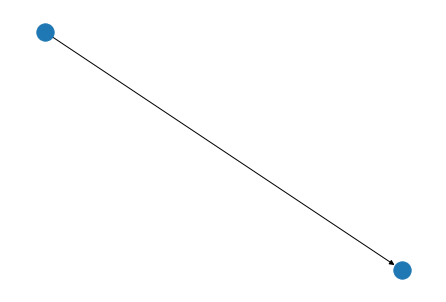

In [55]:
import networkx as nx
import matplotlib.pyplot as plt

g = nx.DiGraph()
g.add_edge(1,2)
nx.draw(g)
plt.show()

In [56]:
temp = {1: "Timeout Win", }

In [57]:
import os

for i in os.walk("vgdl/games"):
    for j in i[2]:
        if "_" not in j and j[-3:] == "txt":
            game_name = "vgdl_" + j.split(".")[0] + "-v0"
            env = gnwrapper.Monitor(gym.make(game_name, obs_type="objects"))
            if check_conditions(env):
                print("*"*30)
                for t in env.game.domain.terminations:
                    print("*"*10)
                    print(
                            t.limit,
                            t.score,
                            t.stype,
                            t.win)

            #print(game_name, env.game.domain.terminations)

NameError: name 'check_conditions' is not defined

In [58]:
def check_conditions(env):
    isSpriteCounter = True
    for i in env.game.domain.terminations:
        if not type(i) == vgdl.ontology.terminations.SpriteCounter:
            isSpriteCounter = False
    return isSpriteCounter

In [59]:
dir(env.game.domain.terminations[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'is_done',
 'limit',
 'score',
 'stype',
 'win']

In [60]:
def create_nodes(env):
    for i in env.game.domain.terminations:
        if(i.win):
            G = nx.DiGraph()
            create_win_graph(i.stype, env.game.domain.collision_eff,G,0,{})
    return G

In [61]:
def create_win_graph(stype, collision_eff,G,root_id,dic):
    last_id = root_id + 1
    for ef in collision_eff:
        print(stype,ef.actee_stype,ef.call_fn)
        if check_eff(ef.actor_stype,stype,ef.call_fn):
            print(stype,ef.actee_stype,ef.call_fn)
            at = ef.actee_stype
            if not at in dic:
                dic[at] = last_id
                #last_id += 1
            G.add_edge(dic[at],root_id)
            last_id,G,dic = create_win_graph(at,collision_eff,G,dic[at],dic)
    return last_id,G,dic



In [62]:
def check_eff(actor_stype, stype, call_fn):
    remove_fns = [vgdl.ontology.effects.killSprite]
    if(actor_stype == stype and call_fn in remove_fns):
        return True
    return False

box wall <function stepBack at 0x7f34415328c0>
box avatar <function bounceForward at 0x7f34415329e0>
box wall <function undoAll at 0x7f3441532950>
box box <function undoAll at 0x7f3441532950>
box hole <function killSprite at 0x7f344151e0e0>
box hole <function killSprite at 0x7f344151e0e0>
hole wall <function stepBack at 0x7f34415328c0>
hole avatar <function bounceForward at 0x7f34415329e0>
hole wall <function undoAll at 0x7f3441532950>
hole box <function undoAll at 0x7f3441532950>
hole hole <function killSprite at 0x7f344151e0e0>


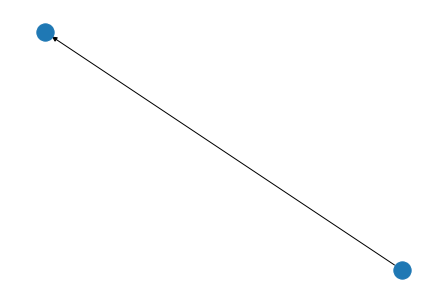

In [63]:
import networkx as nx
import matplotlib.pyplot as plt

env = gnwrapper.Monitor(gym.make("vgdl_sokoban-v0", obs_type="objects"))
G=create_nodes(env)
nx.draw(G)
plt.show()

In [64]:
import glob
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import networkx as nx
import io
import ast
def create_matrix_from_layout(folder):
    files = glob.glob(folder)
    graph_set = {}
    for f in files:
        fname = os.path.basename(f)
        with open(f, "r") as tmp:
            tmp_data = tmp.read()
        tmp_data = re.sub(r"[^wA\n]", r"0", tmp_data)
        tmp_data = tmp_data.replace("w", "1").replace("A", "0")
        tmp_data = re.sub(r'([A-Za-z0-9])', r"\1,", tmp_data)
        tmp = tmp_data.split()
        tmp = [x[:-1] for x in tmp]
        tmp = [item + ':' for item in tmp]
        tmp = [line.split(':') for line in tmp]
        tmp = [i[:1] for i in tmp]
        tmp = [elem.split(',') for e in tmp for elem in e]
        tmp = [[int(num) for num in e[:]] for e in tmp]
        arr = np.array(tmp)
        #print(arr)
        #print(arr.shape)
        coor = np.array(list(product(*map(range, arr.shape))))
        G = nx.grid_2d_graph(*arr.shape)
        G.remove_nodes_from(map(tuple, coor[arr.flatten() == 1]))
        graph_set[fname] = G
        #nx.draw(G)
        #plt.title(fname)
        #plt.show()
    return graph_set

create_matrix_from_layout("/home/irafm/hyner/vgdl_2_0/py-vgdl/vgdl/layouts/*.txt")

{'chase_lvl0.txt': <networkx.classes.graph.Graph at 0x7f3459430410>,
 'survivezombies_lvl0.txt': <networkx.classes.graph.Graph at 0x7f34596f3ed0>,
 'portals_lvl0.txt': <networkx.classes.graph.Graph at 0x7f34596c4210>,
 'aliens_lvl0.txt': <networkx.classes.graph.Graph at 0x7f3459607ed0>,
 'zelda_lvl0.txt': <networkx.classes.graph.Graph at 0x7f3459607510>,
 'frogs_lvl0.txt': <networkx.classes.graph.Graph at 0x7f3459607090>,
 'boulderdash_lvl0.txt': <networkx.classes.graph.Graph at 0x7f3459607290>,
 'missilecommand_lvl0.txt': <networkx.classes.graph.Graph at 0x7f3459607950>,
 'sokoban_lvl0.txt': <networkx.classes.graph.Graph at 0x7f345965aad0>}